## install sklearn

In [1]:
! pip install scikit-learn

You should consider upgrading via the 'C:\Users\user\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


### import all libraries needed

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pprint import pprint                                       #to print out dictionary
import time                                                     #to calculate time taken
from sklearn.model_selection import train_test_split            #for splitting
from sklearn.feature_selection import SelectKBest,chi2          #for feature selection
from sklearn.feature_selection import RFE                       #for feature selection
from sklearn.model_selection import cross_val_score             #for cross validation
from sklearn.tree import DecisionTreeClassifier                 
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.metrics import confusion_matrix,classification_report #for performance measure

In [3]:
cd D:/OneDrive - Universiti Sains Malaysia/USM/Y1S2/CPC152/CPC152_Group30

D:\OneDrive - Universiti Sains Malaysia\USM\Y1S2\CPC152\CPC152_Group30


In [4]:
df=pd.read_csv('heart_disease.csv')  

## EDA 

In [5]:
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [6]:
df.describe(include='all')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [8]:
df.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [9]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [94]:
df['sex'].value_counts()

1    52
0    24
Name: sex, dtype: int64

In [10]:
df.corr()['target'].sort_values(ascending=False)

target      1.000000
cp          0.433798
thalach     0.421741
slope       0.345877
restecg     0.137230
fbs        -0.028046
chol       -0.085239
trestbps   -0.144931
age        -0.225439
sex        -0.280937
thal       -0.344029
ca         -0.391724
oldpeak    -0.430696
exang      -0.436757
Name: target, dtype: float64

#### check for missing values

In [11]:
df.isnull().any()

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool

In [12]:
df.isnull().values.any()

False

### X,Y

In [13]:
X=df.drop('target',axis=1)
Y=df['target']

# Feature Selection

#### SelectKBest 

In [14]:
#default version
bestfeatures = SelectKBest()
fit_skb2 = bestfeatures.fit(X,Y)
dfscores = pd.DataFrame(fit_skb2.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

       Specs      Score
8      exang  70.952438
2         cp  69.772271
9    oldpeak  68.551439
7    thalach  65.120104
11        ca  54.559834
10     slope  40.902071
12      thal  40.407696
1        sex  25.792191
0        age  16.116700
3   trestbps   6.458169


In [15]:
#chi2
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit_skb1 = bestfeatures.fit(X,Y)
dfscores = pd.DataFrame(fit_skb1.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)     #concat two dataframes for better visualization 
featureScores.columns = ['Specs','Score']   #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

       Specs       Score
7    thalach  188.320472
9    oldpeak   72.644253
11        ca   66.440765
2         cp   62.598098
8      exang   38.914377
4       chol   23.936394
0        age   23.286624
3   trestbps   14.823925
10     slope    9.804095
1        sex    7.576835


#### RFE

In [16]:
rfe_selector = RFE(estimator=DecisionTreeClassifier(),n_features_to_select = 10, step = 1)
fit_rfe1 = rfe_selector.fit(X,Y)
dfscores = pd.DataFrame(fit_rfe1.ranking_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Ranking']  #naming the dataframe columns
print(featureScores.nsmallest(10,'Ranking'))  #print 10 best features

       Specs  Ranking
0        age        1
1        sex        1
2         cp        1
3   trestbps        1
4       chol        1
7    thalach        1
9    oldpeak        1
10     slope        1
11        ca        1
12      thal        1


In [17]:
rfe_selector = RFE(estimator=LinearSVC(),n_features_to_select = 10, step = 1)
fit_rfe2 = rfe_selector.fit(X,Y)
dfscores = pd.DataFrame(fit_rfe2.ranking_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Ranking']  #naming the dataframe columns
print(featureScores.nsmallest(10,'Ranking'))  #print 10 best features
featureScores

      Specs  Ranking
0       age        1
1       sex        1
2        cp        1
5       fbs        1
6   restecg        1
8     exang        1
9   oldpeak        1
10    slope        1
11       ca        1
12     thal        1


C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


,Specs,Ranking
0,age,1
1,sex,1
2,cp,1
3,trestbps,3
4,chol,4
5,fbs,1
6,restecg,1
7,thalach,2
8,exang,1
9,oldpeak,1


In [18]:
X_new=df[['age','sex','cp','trestbps','chol','thalach','exang','oldpeak','ca','thal']]
X_new.head(10)

,age,sex,cp,trestbps,chol,thalach,exang,oldpeak,ca,thal
0,63,1,3,145,233,150,0,2.3,0,1
1,37,1,2,130,250,187,0,3.5,0,2
2,41,0,1,130,204,172,0,1.4,0,2
3,56,1,1,120,236,178,0,0.8,0,2
4,57,0,0,120,354,163,1,0.6,0,2
5,57,1,0,140,192,148,0,0.4,0,1
6,56,0,1,140,294,153,0,1.3,0,2
7,44,1,1,120,263,173,0,0.0,0,3
8,52,1,2,172,199,162,0,0.5,0,3
9,57,1,2,150,168,174,0,1.6,0,2


# train test split

In [19]:
X_train,X_test,Y_train,Y_test=train_test_split(X_new,Y,random_state=42,stratify=df['sex'])

In [20]:
X_train2,X_test2,Y_train2,Y_test2=train_test_split(X_new,Y,random_state=42,stratify=df['sex'],test_size=0.2)

In [21]:
sex = df['sex'].value_counts().sort_index()
#print('\nAfter categorized:\n{}'.format(sex))
print('gender:\n',sex)

print('\nOverall dataset: ')
print(sex/len(df)*100)

# random split
random_trainX,random_trainY,random_testX,random_testY = train_test_split(X_new,Y,random_state=42)
random_train_sex_count = random_trainX['sex'].value_counts().sort_index()
print('\nRandom split: ')
print(random_train_sex_count/len(random_trainX)*100)

# stratify split
train_set_sex_count = X_train['sex'].value_counts().sort_index()
print('\nStartify split: ')
print(train_set_sex_count/len(X_train)*100)

gender:
 0     96
1    207
Name: sex, dtype: int64

Overall dataset: 
0    31.683168
1    68.316832
Name: sex, dtype: float64

Random split: 
0    33.920705
1    66.079295
Name: sex, dtype: float64

Startify split: 
0    31.718062
1    68.281938
Name: sex, dtype: float64


In [22]:
print(X_train.shape,Y_train.shape)
print(X_train2.shape,Y_train2.shape)

(227, 10) (227,)
(242, 10) (242,)


# Decision Tree

### train,test set 1

In [23]:
#normal model without hyperparameter
dtc_normal= DecisionTreeClassifier()
scores_dtc_normal=cross_val_score(dtc_normal,X_train,Y_train,cv=5)

In [24]:
#hyperparameters
criterion=['gini','entropy']
splitter=['best','random']
max_depth=range(3,25,3)
min_samples_leaf=range(10,101,10)

In [25]:
#lists to store scores
as_dt_cri=[]
as_dt_split=[]
as_dt_md=[]
as_dt_msl=[]

#map into models
for c in criterion:
    dtc_cri=DecisionTreeClassifier(random_state=0,criterion=c)
    scores_c=cross_val_score(dtc_cri,X_train,Y_train,cv=5)
    as_dt_cri.append(scores_c.mean())
    
for s in splitter:
    dtc_spt=DecisionTreeClassifier(random_state=0,splitter=s)
    scores_s=cross_val_score(dtc_spt,X_train,Y_train,cv=5)
    as_dt_split.append(scores_s.mean())
    
for i in max_depth:
    dtc_md=DecisionTreeClassifier(random_state=0,max_depth=i)
    scores_md=cross_val_score(dtc_md,X_train,Y_train,cv=5)
    as_dt_md.append(scores_md.mean())
    
for i in min_samples_leaf:
    dtc_msl=DecisionTreeClassifier(random_state=0,min_samples_leaf=i)
    scores_msl=cross_val_score(dtc_msl,X_train,Y_train,cv=5)
    as_dt_msl.append(scores_msl.mean())

In [26]:
def makedict(lst1,lst2):
    dct={lst1[i]:lst2[i] for i in range(0,len(lst1))}
    return dct

In [27]:
#take a look at all accuracy 
print('\n score of default version DecisionTreeClassifier : ',scores_dtc_normal.mean())
print('\n tuned hyperparameters: ')
print('\n scores of criterion:')
pprint(makedict(criterion,as_dt_cri),width=1)
print('\n scores of splitter:')
pprint(makedict(splitter,as_dt_split),width=1)
print('\n scores of max_depth:')
pprint(makedict(max_depth,as_dt_md),width=1)
print('\n scores of min_samples_leaf:')
pprint(makedict(min_samples_leaf,as_dt_msl),width=1)


 score of default version DecisionTreeClassifier :  0.7357487922705314

 tuned hyperparameters: 

 scores of criterion:
{'entropy': 0.7534299516908213,
 'gini': 0.740096618357488}

 scores of splitter:
{'best': 0.740096618357488,
 'random': 0.7667632850241546}

 scores of max_depth:
{3: 0.7882125603864735,
 6: 0.7311111111111112,
 9: 0.740096618357488,
 12: 0.740096618357488,
 15: 0.740096618357488,
 18: 0.740096618357488,
 21: 0.740096618357488,
 24: 0.740096618357488}

 scores of min_samples_leaf:
{10: 0.8016425120772948,
 20: 0.7623188405797101,
 30: 0.7441545893719808,
 40: 0.717487922705314,
 50: 0.6956521739130435,
 60: 0.6956521739130435,
 70: 0.6956521739130435,
 80: 0.7445410628019323,
 90: 0.6829951690821257,
 100: 0.546280193236715}


Text(0.5, 1.0, 'scores of min_samples_leaf')

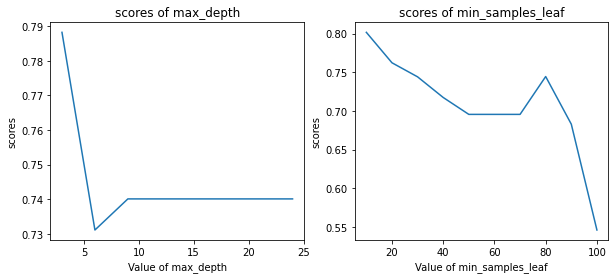

In [28]:
#plot graph
dtfig= plt.figure(figsize=(10,4))

ax11=dtfig.add_subplot(1,2,1)      #1st plot
plt.plot(max_depth,as_dt_md)
plt.xlabel('Value of max_depth')
plt.ylabel('scores')
plt.title('scores of max_depth')

ax12=dtfig.add_subplot(1,2,2)     #2nd plot
plt.plot(min_samples_leaf,as_dt_msl)
plt.xlabel('Value of min_samples_leaf')
plt.ylabel('scores')
plt.title('scores of min_samples_leaf')

In [29]:
#print out largest score's 
print('largest:')
print('criterion: ', criterion[ as_dt_cri.index(max(as_dt_cri))])
print('splitter: ',splitter[ as_dt_split.index(max(as_dt_split))])
print('max_depth: ',max_depth[ as_dt_md.index(max(as_dt_md))])
print('min_samples_leaf: ',min_samples_leaf[ as_dt_msl.index(max(as_dt_msl))])

largest:
criterion:  entropy
splitter:  random
max_depth:  3
min_samples_leaf:  10


In [30]:
dtc= DecisionTreeClassifier(criterion='entropy',splitter='random',max_depth=3,min_samples_leaf=10,random_state=0)
t_dtc = time.time()  #start timer
dtc=dtc.fit(X_train,Y_train)
print("Training time:", (time.time())-t_dtc)  #stop timer
dtc

Training time: 0.00599980354309082


DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=10,
                       random_state=0, splitter='random')

In [31]:
%%time
dtc= DecisionTreeClassifier(criterion='entropy',splitter='random',max_depth=3,min_samples_leaf=10,random_state=0)
dtc=dtc.fit(X_train,Y_train)
Y_pred_dtc=dtc.predict(X_test)

CPU times: total: 0 ns
Wall time: 11 ms


In [32]:
print(Y_pred_dtc)

[1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 0 1 0 0 1 1 1 1 1 0 1 0 0 1 1 1 0 1 1 0 1
 0 1 1 0 0 0 0 0 1 1 0 1 1 1 1 1 1 1 0 0 1 1 0 1 1 0 0 0 1 1 1 0 1 0 1 1 0
 1 1]


### train, test set 2

In [33]:
#normal model without hyperparameter
scores_dtc_normal2=cross_val_score(dtc_normal,X_train2,Y_train2,cv=5)

In [34]:
#lists to store scores
as_dt_cri2=[]
as_dt_split2=[]
as_dt_md2=[]
as_dt_msl2=[]

#map into models
for c in criterion:
    dtc_cri=DecisionTreeClassifier(random_state=0,criterion=c)
    scores_c2=cross_val_score(dtc_cri,X_train2,Y_train2,cv=5)
    as_dt_cri2.append(scores_c2.mean())
    
for s in splitter:
    dtc_spt=DecisionTreeClassifier(random_state=0,splitter=s)
    scores_s2=cross_val_score(dtc_spt,X_train2,Y_train2,cv=5)
    as_dt_split2.append(scores_s2.mean())
    
for i in max_depth:
    dtc_md=DecisionTreeClassifier(random_state=0,max_depth=i)
    scores_md2=cross_val_score(dtc_md,X_train2,Y_train2,cv=5)
    as_dt_md2.append(scores_md2.mean())
    
for i in min_samples_leaf:
    dtc_msl=DecisionTreeClassifier(random_state=0,min_samples_leaf=i)
    scores_msl2=cross_val_score(dtc_msl,X_train2,Y_train2,cv=5)
    as_dt_msl2.append(scores_msl2.mean())

In [35]:
#take a look at all accuracy 
print('\n score of default version DecisionTreeClassifier : ',scores_dtc_normal2.mean())
print('\n tuned hyperparameters: ')
print('\n scores of criterion:')
pprint(makedict(criterion,as_dt_cri2),width=1)
print('\n scores of splitter:')
pprint(makedict(splitter,as_dt_split2),width=1)
print('\n scores of max_depth:')
pprint(makedict(max_depth,as_dt_md2),width=1)
print('\n scores of min_samples_leaf:')
pprint(makedict(min_samples_leaf,as_dt_msl2),width=1)


 score of default version DecisionTreeClassifier :  0.7563775510204082

 tuned hyperparameters: 

 scores of criterion:
{'entropy': 0.7726190476190476,
 'gini': 0.7851190476190475}

 scores of splitter:
{'best': 0.7851190476190475,
 'random': 0.7314625850340135}

 scores of max_depth:
{3: 0.7852891156462586,
 6: 0.7646258503401361,
 9: 0.7728741496598639,
 12: 0.7851190476190475,
 15: 0.7851190476190475,
 18: 0.7851190476190475,
 21: 0.7851190476190475,
 24: 0.7851190476190475}

 scores of min_samples_leaf:
{10: 0.8062925170068027,
 20: 0.7607993197278912,
 30: 0.752295918367347,
 40: 0.752295918367347,
 50: 0.7277210884353742,
 60: 0.7277210884353742,
 70: 0.7522108843537414,
 80: 0.7522108843537414,
 90: 0.7030612244897958,
 100: 0.5537414965986394}


Text(0.5, 1.0, 'scores of min_samples_leaf')

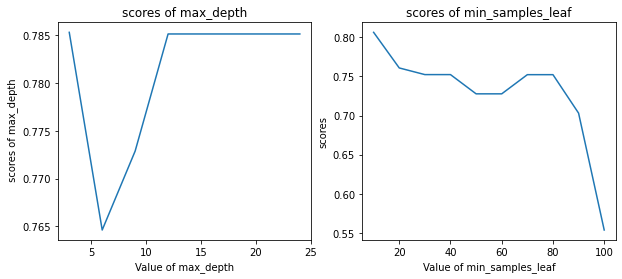

In [36]:
#plot graph
dtfig2= plt.figure(figsize=(10,4))

ax21=dtfig2.add_subplot(1,2,1)      #1st plot
plt.plot(max_depth,as_dt_md2)
plt.xlabel('Value of max_depth')
plt.ylabel(' scores of max_depth')
plt.title('scores of max_depth')

ax22=dtfig2.add_subplot(1,2,2)     #2nd plot
plt.plot(min_samples_leaf,as_dt_msl2)
plt.xlabel('Value of min_samples_leaf')
plt.ylabel('scores')
plt.title('scores of min_samples_leaf')

In [37]:
#print out largest score's 
print('largest:')
print('criterion: ', criterion[ as_dt_cri2.index(max(as_dt_cri2))])
print('splitter: ',splitter[ as_dt_split2.index(max(as_dt_split2))])
print('max_depth: ',max_depth[ as_dt_md2.index(max(as_dt_md2))])
print('min_samples_leaf: ',min_samples_leaf[ as_dt_msl2.index(max(as_dt_msl2))])

largest:
criterion:  gini
splitter:  best
max_depth:  3
min_samples_leaf:  10


In [38]:
#fit model

In [39]:
dtc2= DecisionTreeClassifier(criterion='gini',splitter='best',max_depth=3,min_samples_leaf=10,random_state=0)
t_dtc2 = time.time()  #start timer
dtc2=dtc2.fit(X_train2,Y_train2)
print("Training time:", (time.time())-t_dtc2)  #stop timer
dtc2

Training time: 0.006991386413574219


DecisionTreeClassifier(max_depth=3, min_samples_leaf=10, random_state=0)

In [40]:
%%time
dtc2= DecisionTreeClassifier(criterion='entropy',splitter='random',max_depth=3,min_samples_leaf=10,random_state=0)
dtc2=dtc2.fit(X_train2,Y_train2)
Y_pred_dtc2=dtc2.predict(X_test2)

CPU times: total: 31.2 ms
Wall time: 9.98 ms


In [41]:
print(Y_pred_dtc2)

[1 1 0 1 0 0 1 1 1 1 0 0 0 1 0 1 1 1 0 1 1 0 0 1 0 1 1 1 1 1 0 1 0 1 1 1 0
 1 0 1 1 1 1 0 1 0 1 1 0 1 0 1 0 1 0 1 0 0 1 1 1]


# Naive Bayes

### train test set 1

In [42]:
#original GaussianNb model
gnb_normal= GaussianNB()
scores_gnb=cross_val_score(gnb_normal,X_train,Y_train,cv=5)
as_gnb=scores_gnb.mean()

In [43]:
print(np.logspace(0,-20, num=10))

[1.00000000e+00 5.99484250e-03 3.59381366e-05 2.15443469e-07
 1.29154967e-09 7.74263683e-12 4.64158883e-14 2.78255940e-16
 1.66810054e-18 1.00000000e-20]


In [44]:
var_smoothing=np.logspace(0,-20, num=10)
as_gnb_vs=[]

for v in var_smoothing:
    gnb_vs=GaussianNB(var_smoothing=v)
    scores_gnb_vs=cross_val_score(gnb_vs,X_train,Y_train,cv=5)
    as_gnb_vs.append(scores_gnb_vs.mean())

In [45]:
#original MultinomialNB model
mnb_normal= MultinomialNB()
scores_mnb=cross_val_score(gnb_vs,X_train,Y_train,cv=5)
as_mnb=scores_mnb.mean()

In [46]:
#alpha=range(0,6)
alpha=range(0,1000,100)
as_mnb_al=[]

for a in alpha:
    mnb_al=MultinomialNB(alpha=a)
    scores_mnb_al=cross_val_score(mnb_al,X_train,Y_train,cv=5)
    as_mnb_al.append(scores_mnb_al.mean())

C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.w

In [47]:
#print scores
print('\n GaussianNB: ',as_gnb)

print('\n GaussianNB: var_smoothing: ')
pprint(makedict(var_smoothing,as_gnb_vs),width=1)
    
print('\n MultinomialNB: ',as_mnb)

print('\n MultinomialNB: alpha: ')
pprint(makedict(alpha,as_mnb_al),width=1)


 GaussianNB:  0.8066666666666666

 GaussianNB: var_smoothing: 
{1e-20: 0.8066666666666666,
 1.6681005372000558e-18: 0.8066666666666666,
 2.7825594022071145e-16: 0.8066666666666666,
 4.6415888336127726e-14: 0.8066666666666666,
 7.742636826811278e-12: 0.8066666666666666,
 1.2915496650148826e-09: 0.8066666666666666,
 2.1544346900318822e-07: 0.8066666666666666,
 3.5938136638046256e-05: 0.8022222222222222,
 0.005994842503189409: 0.6788405797101449,
 1.0: 0.65256038647343}

 MultinomialNB:  0.8066666666666666

 MultinomialNB: alpha: 
{0: 0.7493719806763284,
 100: 0.7010628019323673,
 200: 0.6743961352657004,
 300: 0.6611594202898552,
 400: 0.6478260869565217,
 500: 0.6082125603864734,
 600: 0.5946859903381643,
 700: 0.5771014492753623,
 800: 0.5595169082125604,
 900: 0.5507246376811594}


Text(0.5, 1.0, 'scores of alpha')

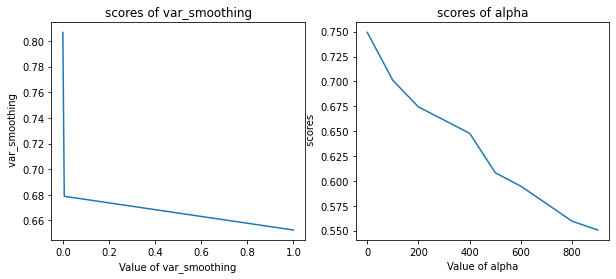

In [48]:
#plot graph
gnbfig= plt.figure(figsize=(10,4))

gnbax11=gnbfig.add_subplot(1,2,1)      #1st plot
plt.plot(var_smoothing,as_gnb_vs)
plt.xlabel('Value of var_smoothing')
plt.ylabel(' var_smoothing')
plt.title('scores of var_smoothing')

gnbax12=gnbfig.add_subplot(1,2,2)     #2nd plot
plt.plot(alpha,as_mnb_al)
plt.xlabel('Value of alpha')
plt.ylabel(' scores')
plt.title('scores of alpha')

In [49]:
#print out largest accuracy
print('largest:')
print('GaussianNB: var_smoothing: ',var_smoothing[ as_gnb_vs.index(max(as_gnb_vs))])

largest:
GaussianNB: var_smoothing:  2.1544346900318822e-07


In [50]:
#fit model
gnb=GaussianNB(var_smoothing=2.1544346900318822e-07)
t_gnb = time.time()  #start timer
gnb=gnb.fit(X_train,Y_train)
print("Training time:", (time.time())-t_gnb)  #stop timer
gnb

Training time: 0.003997325897216797


GaussianNB(var_smoothing=2.1544346900318822e-07)

In [51]:
%%time
gnb=GaussianNB(var_smoothing=2.1544346900318822e-07)
gnb=gnb.fit(X_train,Y_train)
Y_pred_gnb=gnb.predict(X_test)

CPU times: total: 0 ns
Wall time: 10 ms


In [52]:
print(Y_pred_gnb)

[1 1 1 0 1 0 1 1 1 1 1 1 0 1 1 1 0 1 0 0 1 1 0 1 1 1 1 1 0 0 0 1 0 1 1 0 1
 0 1 1 0 0 1 0 0 1 1 0 1 1 1 1 1 1 1 0 0 1 0 1 1 1 0 0 0 1 1 1 0 1 0 1 1 0
 1 1]


### train, test set 2

In [53]:
#original GaussianNb model
gnb_normal= GaussianNB()
scores_gnb2=cross_val_score(gnb_normal,X_train2,Y_train2,cv=5)
as_gnb2=scores_gnb2.mean()

In [54]:
as_gnb_vs2=[]

for v in var_smoothing:
    gnb_vs=GaussianNB(var_smoothing=v)
    scores_gnb_vs2=cross_val_score(gnb_vs,X_train2,Y_train2,cv=5)
    as_gnb_vs2.append(scores_gnb_vs2.mean())

In [55]:
#original MultinomialNB model
scores_mnb2=cross_val_score(gnb_vs,X_train2,Y_train2,cv=5)
as_mnb2=scores_mnb2.mean()

In [56]:
as_mnb_al2=[]

for a in alpha:
    mnb_al=MultinomialNB(alpha=a)
    scores_mnb_al2=cross_val_score(mnb_al,X_train2,Y_train2,cv=5)
    as_mnb_al2.append(scores_mnb_al2.mean())

C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.w

In [57]:
#print scores
print('\n GaussianNB: ',as_gnb2)

print('\n GaussianNB: var_smoothing: ')
pprint(makedict(var_smoothing,as_gnb_vs2),width=1)
    
print('\n MultinomialNB: ',as_mnb2)

print('\n MultinomialNB: alpha: ')
pprint(makedict(alpha,as_mnb_al2),width=1)


 GaussianNB:  0.8143707482993197

 GaussianNB: var_smoothing: 
{1e-20: 0.8143707482993197,
 1.6681005372000558e-18: 0.8143707482993197,
 2.7825594022071145e-16: 0.8143707482993197,
 4.6415888336127726e-14: 0.8143707482993197,
 7.742636826811278e-12: 0.8143707482993197,
 1.2915496650148826e-09: 0.8143707482993197,
 2.1544346900318822e-07: 0.8143707482993197,
 3.5938136638046256e-05: 0.826530612244898,
 0.005994842503189409: 0.6899659863945578,
 1.0: 0.6197278911564627}

 MultinomialNB:  0.8143707482993197

 MultinomialNB: alpha: 
{0: 0.7479591836734694,
 100: 0.7110544217687075,
 200: 0.6819727891156463,
 300: 0.6529761904761904,
 400: 0.6364795918367347,
 500: 0.6034013605442177,
 600: 0.5868197278911566,
 700: 0.5661564625850339,
 800: 0.5619897959183674,
 900: 0.5579081632653061}


Text(0.5, 1.0, 'scores of alpha')

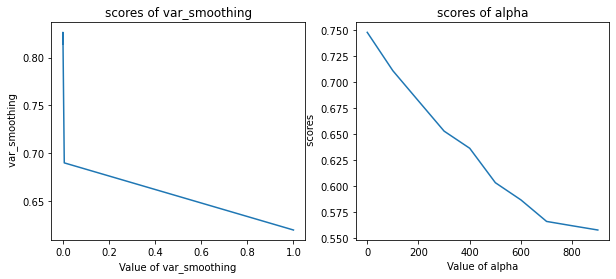

In [58]:
#plot graph
gnbfig2= plt.figure(figsize=(10,4))

gnbax21=gnbfig2.add_subplot(1,2,1)      #1st plot
plt.plot(var_smoothing,as_gnb_vs2)
plt.xlabel('Value of var_smoothing')
plt.ylabel(' var_smoothing')
plt.title('scores of var_smoothing')

gnbax22=gnbfig2.add_subplot(1,2,2)     #2nd plot
plt.plot(alpha,as_mnb_al2)
plt.xlabel('Value of alpha')
plt.ylabel(' scores')
plt.title('scores of alpha')

In [59]:
#print out largest accuracy
print('largest:')
print('GaussianNB: var_smoothing: ',var_smoothing[ as_gnb_vs2.index(max(as_gnb_vs2))])

largest:
GaussianNB: var_smoothing:  3.5938136638046256e-05


In [60]:
#fit model
gnb2=GaussianNB(var_smoothing=3.5938136638046256e-05)
t_gnb2 = time.time()  #start timer
gnb2=gnb2.fit(X_train2,Y_train2)
print("Training time:", (time.time())-t_gnb2)  #stop timer
gnb2

Training time: 0.007002353668212891


GaussianNB(var_smoothing=3.5938136638046256e-05)

In [61]:
%%time
gnb2=GaussianNB(var_smoothing=3.5938136638046256e-05)
gnb2=gnb2.fit(X_train2,Y_train2)
Y_pred_gnb2=gnb2.predict(X_test2)

CPU times: total: 15.6 ms
Wall time: 12 ms


In [62]:
print(Y_pred_gnb2)

[1 1 1 1 0 0 1 1 1 0 0 0 0 1 0 1 1 1 0 1 1 0 0 1 1 0 1 1 1 1 0 1 0 1 1 1 1
 1 0 1 1 1 1 0 1 0 1 0 0 1 0 1 0 1 0 0 0 0 1 1 0]


# Support Vector Machine

In [63]:
from sklearn.svm import LinearSVC,SVC
from sklearn.preprocessing import StandardScaler

### train test set 1

In [64]:
lsvc=LinearSVC()
scores_lsvc=cross_val_score(lsvc,X_train,Y_train,cv=5)
as_lsvc=scores_lsvc.mean()

C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.w

In [65]:
svc=SVC()
scores_svc=cross_val_score(svc,X_train,Y_train,cv=5)
as_svc=scores_svc.mean()

In [66]:
c=[]
gamma=[]
c_value=0.001
for i in range(0,5):
    c_value=c_value*10       #generate c value by multiply of 10
    c.append(c_value)
    gamma.append(c_value)
kernel=['linear', 'sigmoid','rbf']
deg=range(4,7)

In [67]:
as_svc_c=[]
as_svc_g=[]
as_svc_k=[]
as_svc_d=[]

for ci in c:
    svc_c=SVC(C=ci)
    scores_svc_c=cross_val_score(svc_c,X_train,Y_train,cv=5)
    as_svc_c.append(scores_svc_c.mean())
    
for g in gamma:
    svc_g=SVC(gamma=g)
    scores_svc_g=cross_val_score(svc_g,X_train,Y_train,cv=5)
    as_svc_g.append(scores_svc_g.mean())
    
for k in kernel:
    svc_k=SVC(kernel=k)
    scores_svc_k=cross_val_score(svc_k,X_train,Y_train,cv=5)
    as_svc_k.append(scores_svc_k.mean())

for d in deg:
    svc_d=SVC(kernel='poly',degree=d)
    scores_svc_d=cross_val_score(svc_d,X_train,Y_train,cv=5)
    as_svc_d.append(scores_svc_d.mean())

In [68]:
print('\ndefault SVC:',as_svc)
print('\ndefault LinearSVC:',as_lsvc)
print('\nC:')
pprint(makedict(c,as_svc_c),width=1)
print('\ngamma:')
pprint(makedict(gamma,as_svc_g),width=1)
print('\nkernel')
pprint(makedict(kernel,as_svc_k),width=1)
print('\ndegree in polynomial kernel')
pprint(makedict(deg,as_svc_d),width=1)


default SVC: 0.6215458937198067

default LinearSVC: 0.6797101449275361

C:
{0.01: 0.546280193236715,
 0.1: 0.546280193236715,
 1.0: 0.6215458937198067,
 10.0: 0.669951690821256,
 100.0: 0.7096618357487923}

gamma:
{0.01: 0.5284057971014493,
 0.1: 0.546280193236715,
 1.0: 0.546280193236715,
 10.0: 0.546280193236715,
 100.0: 0.546280193236715}

kernel
{'linear': 0.8326570048309179,
 'rbf': 0.6215458937198067,
 'sigmoid': 0.546280193236715}

degree in polynomial kernel
{4: 0.634975845410628,
 5: 0.6306280193236715,
 6: 0.6216425120772947}


Text(0.5, 1.0, 'scores of degree')

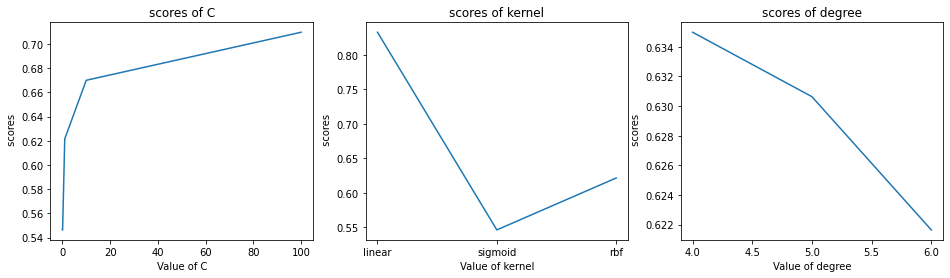

In [69]:
#plot graph
svcfig= plt.figure(figsize=(16,4))

gnbax11=svcfig.add_subplot(1,3,1)      #1st plot
plt.plot(c,as_svc_c)
plt.xlabel('Value of C')
plt.ylabel(' scores')
plt.title('scores of C')

gnbax12=svcfig.add_subplot(1,3,2)     #2nd plot
plt.plot(kernel,as_svc_k)
plt.xlabel('Value of kernel')
plt.ylabel(' scores')
plt.title('scores of kernel')

gnbax13=svcfig.add_subplot(1,3,3)     #3rd plot
plt.plot(deg,as_svc_d)
plt.xlabel('Value of degree')
plt.ylabel(' scores')
plt.title('scores of degree')

In [70]:
#print out largest score's 
print('largest:')
print('C: ', c[as_svc_c.index(max(as_svc_c))])
print('gamma: ',gamma[as_svc_g.index(max(as_svc_g))])
print('kernel: ',kernel[ as_svc_k.index(max(as_svc_k))])
print('degree: ',deg[ as_svc_d.index(max(as_svc_d))])

largest:
C:  100.0
gamma:  0.1
kernel:  linear
degree:  4


In [71]:
#fit model
svc=SVC(C=100,gamma=0.1,kernel='linear',degree=4)
t_svc = time.time()  #start timer
svc=svc.fit(X_train,Y_train)
print("Training time:", (time.time())-t_svc)  #stop timer
svc

Training time: 11.689191102981567


SVC(C=100, degree=4, gamma=0.1, kernel='linear')

In [72]:
%%time
svc=SVC(C=100,gamma=0.1,kernel='linear',degree=4)
svc=svc.fit(X_train,Y_train)
Y_pred_svc=svc.predict(X_test)

CPU times: total: 12.8 s
Wall time: 12.8 s


In [73]:
print(Y_pred_svc)

[1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 1 1 1 1 1 1 1 0 0 0 1 0 0 1 0 1
 0 1 1 0 0 1 0 0 1 1 0 1 1 1 1 1 1 1 0 0 1 0 1 1 1 0 1 0 1 1 1 0 0 0 1 1 0
 0 1]


### train, test set 2

In [74]:
scores_lsvc2=cross_val_score(lsvc,X_train2,Y_train2,cv=5)
as_lsvc2=scores_lsvc2.mean()

C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.w

In [75]:
scores_svc2=cross_val_score(svc,X_train2,Y_train2,cv=5)
as_svc2=scores_svc2.mean()

In [76]:
as_svc_c2=[]
as_svc_g2=[]
as_svc_k2=[]
as_svc_d2=[]

for ci in c:
    svc_c=SVC(C=ci)
    scores_svc_c2=cross_val_score(svc_c,X_train2,Y_train2,cv=5)
    as_svc_c2.append(scores_svc_c2.mean())
    
for g in gamma:
    svc_g=SVC(gamma=g)
    scores_svc_g2=cross_val_score(svc_g,X_train2,Y_train2,cv=5)
    as_svc_g2.append(scores_svc_g2.mean())
    
for k in kernel:
    svc_k=SVC(kernel=k)
    scores_svc_k2=cross_val_score(svc_k,X_train2,Y_train2,cv=5)
    as_svc_k2.append(scores_svc_k2.mean())

for d in deg:
    svc_d=SVC(kernel='poly',degree=d)
    scores_svc_d2=cross_val_score(svc_d,X_train2,Y_train2,cv=5)
    as_svc_d2.append(scores_svc_d2.mean())

In [77]:
print('\ndefault SVC:',as_svc2)
print('\ndefault LinearSVC:',as_lsvc2)
print('\nC:')
pprint(makedict(c,as_svc_c2),width=1)
print('\ngamma:')
pprint(makedict(gamma,as_svc_g2),width=1)
print('\nkernel')
pprint(makedict(kernel,as_svc_k2),width=1)
print('\ndegree in polynomial kernel')
pprint(makedict(deg,as_svc_d2),width=1)


default SVC: 0.7976190476190477

default LinearSVC: 0.672704081632653

C:
{0.01: 0.5537414965986394,
 0.1: 0.5537414965986394,
 1.0: 0.6404761904761905,
 10.0: 0.6653911564625851,
 100.0: 0.6942176870748299}

gamma:
{0.01: 0.55,
 0.1: 0.5537414965986394,
 1.0: 0.5537414965986394,
 10.0: 0.5537414965986394,
 100.0: 0.5537414965986394}

kernel
{'linear': 0.805952380952381,
 'rbf': 0.6404761904761905,
 'sigmoid': 0.5537414965986394}

degree in polynomial kernel
{4: 0.6695578231292518,
 5: 0.6737244897959184,
 6: 0.6694727891156462}


Text(0.5, 1.0, 'scores of degree')

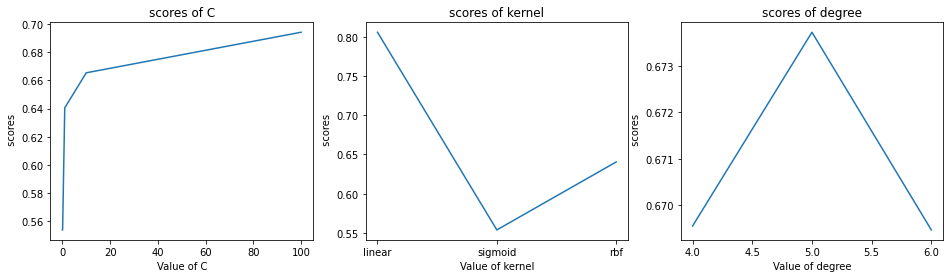

In [78]:
#plot graph
svcfig2= plt.figure(figsize=(16,4))

gnbax21=svcfig2.add_subplot(1,3,1)      #1st plot
plt.plot(c,as_svc_c2)
plt.xlabel('Value of C')
plt.ylabel(' scores')
plt.title('scores of C')

gnbax22=svcfig2.add_subplot(1,3,2)     #2nd plot
plt.plot(kernel,as_svc_k2)
plt.xlabel('Value of kernel')
plt.ylabel(' scores')
plt.title('scores of kernel')

gnbax23=svcfig2.add_subplot(1,3,3)     #3rd plot
plt.plot(deg,as_svc_d2)
plt.xlabel('Value of degree')
plt.ylabel(' scores')
plt.title('scores of degree')

In [79]:
#print out largest score's 
print('largest:')
print('C: ', c[as_svc_c2.index(max(as_svc_c2))])
print('gamma: ',gamma[as_svc_g2.index(max(as_svc_g2))])
print('kernel: ',kernel[ as_svc_k2.index(max(as_svc_k2))])
print('degree: ',deg[ as_svc_d2.index(max(as_svc_d2))])

largest:
C:  100.0
gamma:  0.1
kernel:  linear
degree:  5


In [80]:
#fit model
svc2=SVC(C=100,gamma=0.1,kernel='linear',degree=5)
t_svc2 = time.time()  #start timer
svc2=svc2.fit(X_train2,Y_train2)
print("Training time:", (time.time())-t_svc2)  #stop timer
svc2

Training time: 10.474620580673218


SVC(C=100, degree=5, gamma=0.1, kernel='linear')

In [81]:
%%time
svc2=SVC(C=100,gamma=0.1,kernel='linear',degree=5)
svc2=svc2.fit(X_train2,Y_train2)
Y_pred_svc2=svc2.predict(X_test2)

CPU times: total: 9.78 s
Wall time: 9.88 s


In [82]:
print(Y_pred_svc2)

[1 1 1 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1
 1 0 1 1 1 1 0 1 0 1 0 0 1 0 1 0 1 1 0 0 0 1 1 0]


# performance measure


### classification report

In [83]:
print('Decision Tree: ')
print('train,test set 1:')
print(classification_report(Y_test,Y_pred_dtc))
print('train,test set 2:')
print(classification_report(Y_test2,Y_pred_dtc2))

Decision Tree: 
train,test set 1:
              precision    recall  f1-score   support

           0       0.89      0.69      0.77        35
           1       0.78      0.93      0.84        41

    accuracy                           0.82        76
   macro avg       0.83      0.81      0.81        76
weighted avg       0.83      0.82      0.81        76

train,test set 2:
              precision    recall  f1-score   support

           0       0.87      0.67      0.75        30
           1       0.74      0.90      0.81        31

    accuracy                           0.79        61
   macro avg       0.80      0.78      0.78        61
weighted avg       0.80      0.79      0.78        61



In [84]:
print('Naive Bayes: ')
print('train,test set 1:')
print(classification_report(Y_test,Y_pred_gnb))
print('train,test set 2:')
print(classification_report(Y_test2,Y_pred_gnb2))

Naive Bayes: 
train,test set 1:
              precision    recall  f1-score   support

           0       0.93      0.71      0.81        35
           1       0.80      0.95      0.87        41

    accuracy                           0.84        76
   macro avg       0.86      0.83      0.84        76
weighted avg       0.86      0.84      0.84        76

train,test set 2:
              precision    recall  f1-score   support

           0       0.96      0.80      0.87        30
           1       0.83      0.97      0.90        31

    accuracy                           0.89        61
   macro avg       0.90      0.88      0.88        61
weighted avg       0.90      0.89      0.88        61



In [85]:
print('SVM: ')
print('train,test set 1:')
print(classification_report(Y_test,Y_pred_svc))
print('train,test set 2:')
print(classification_report(Y_test2,Y_pred_svc2))

SVM: 
train,test set 1:
              precision    recall  f1-score   support

           0       0.89      0.71      0.79        35
           1       0.79      0.93      0.85        41

    accuracy                           0.83        76
   macro avg       0.84      0.82      0.82        76
weighted avg       0.84      0.83      0.83        76

train,test set 2:
              precision    recall  f1-score   support

           0       0.88      0.73      0.80        30
           1       0.78      0.90      0.84        31

    accuracy                           0.82        61
   macro avg       0.83      0.82      0.82        61
weighted avg       0.83      0.82      0.82        61



### confusion matrix

In [86]:
print('decision tree:')
print('\ntrain,test set 1: ')
print(confusion_matrix(Y_test,Y_pred_dtc))
print('\ntrain,test set 2:')
print(confusion_matrix(Y_test2,Y_pred_dtc2))

decision tree:

train,test set 1: 
[[24 11]
 [ 3 38]]

train,test set 2:
[[20 10]
 [ 3 28]]


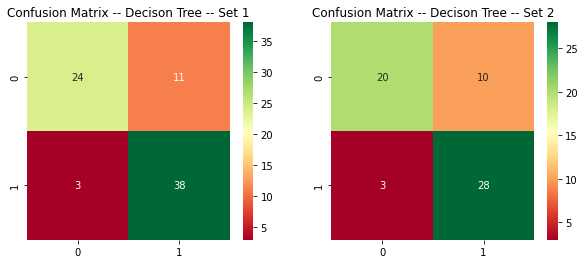

In [87]:
fig1= plt.figure(figsize=(10,4))
#1
matrix11 = pd.DataFrame(confusion_matrix(Y_test,Y_pred_dtc))
ax1 = fig1.add_subplot(1,2,1)
sns.heatmap(matrix11,annot=True,cmap='RdYlGn')
plt.title('Confusion Matrix -- Decison Tree -- Set 1')
#2
matrix12 = pd.DataFrame(confusion_matrix(Y_test2,Y_pred_dtc2))
ax2 = fig1.add_subplot(1,2,2)
sns.heatmap(matrix12,annot=True,cmap='RdYlGn')
plt.title('Confusion Matrix -- Decison Tree -- Set 2')
plt.show()

In [88]:
print('Naive Bayes: ')
print('\ntrain,test set 1:')
print(confusion_matrix(Y_test,Y_pred_gnb))
print('\ntrain,test set 2:')
print(confusion_matrix(Y_test2,Y_pred_gnb2))

Naive Bayes: 

train,test set 1:
[[25 10]
 [ 2 39]]

train,test set 2:
[[24  6]
 [ 1 30]]


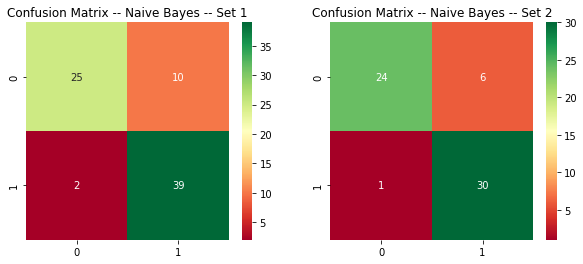

In [89]:
fig2= plt.figure(figsize=(10,4))
#1
matrix21 = pd.DataFrame(confusion_matrix(Y_test,Y_pred_gnb))
ax1 = fig2.add_subplot(1,2,1)
sns.heatmap(matrix21,annot=True,cmap='RdYlGn')
plt.title('Confusion Matrix -- Naive Bayes -- Set 1')
#2
matrix22 = pd.DataFrame(confusion_matrix(Y_test2,Y_pred_gnb2))
ax2 = fig2.add_subplot(1,2,2)
sns.heatmap(matrix22,annot=True,cmap='RdYlGn')
plt.title('Confusion Matrix -- Naive Bayes -- Set 2')
plt.show()

In [90]:
print('SVM: ')
print('\ntrain,test set 1:')
print(confusion_matrix(Y_test,Y_pred_svc))
print('\ntrain,test set 2:')
print(confusion_matrix(Y_test2,Y_pred_svc2))

SVM: 

train,test set 1:
[[25 10]
 [ 3 38]]

train,test set 2:
[[22  8]
 [ 3 28]]


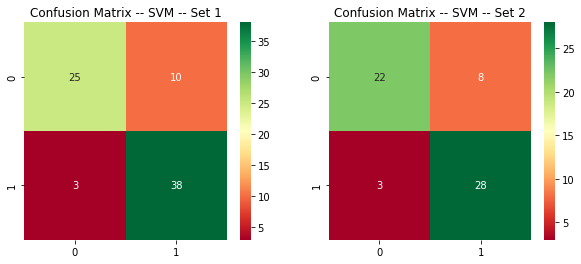

In [91]:
fig3= plt.figure(figsize=(10,4))
#1
matrix31 = pd.DataFrame(confusion_matrix(Y_test,Y_pred_svc))
ax1 = fig3.add_subplot(1,2,1)
sns.heatmap(matrix31,annot=True,cmap='RdYlGn')
plt.title('Confusion Matrix -- SVM -- Set 1')
#2
matrix32 = pd.DataFrame(confusion_matrix(Y_test2,Y_pred_svc2))
ax2 = fig3.add_subplot(1,2,2)
sns.heatmap(matrix32,annot=True,cmap='RdYlGn')
plt.title('Confusion Matrix -- SVM -- Set 2')
plt.show()

# champion model

#### The champion model is Naive Bayes, so we add its prediction into the test set

In [92]:
df=pd.DataFrame(X_test)
df['target']=Y_test
df['prediction']=Y_pred_gnb
df

,age,sex,cp,trestbps,chol,thalach,exang,oldpeak,ca,thal,target,prediction
55,52,1,1,134,201,158,0,0.8,1,2,1,1
156,47,1,2,130,253,179,0,0.0,0,2,1,1
278,58,0,1,136,319,152,0,0.0,2,2,0,1
233,64,1,0,120,246,96,1,2.2,1,2,0,0
21,44,1,2,130,233,179,1,0.4,0,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
145,70,1,1,156,245,143,0,0.0,0,2,1,1
282,59,1,2,126,218,134,0,2.2,1,1,0,1
224,54,1,0,110,239,126,1,2.8,1,3,0,0
245,48,1,0,124,274,166,0,0.5,0,3,0,1


#### export to csv file

In [93]:
df.to_csv('results.csv')